# Exercises in neural network and deep learning I

In [29]:
#try out with different numbers of layers, neurons and see how much of a difference it makes changing those variable

## Exercise 1

For the classification of movie review model of chapter 4 of the book, please try out the "4.1.6 Further experiments" mentioned on page 105. (You can use the code from the chapter 4 notebook "chapter04_getting-started-with-neural-networks.ipynb" as your departure.)

In [30]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

**Encoding the integer sequences via multi-hot encoding**

In [31]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [32]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Model definition**

In [33]:
from tensorflow import keras
from tensorflow.keras import layers


#single representation layered model
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#triple representation layered model
model3 = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



**Model compilation**

In [34]:
model1.compile(optimizer= 'rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])




model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
history1 = model1.fit(partial_x_train,
                     partial_y_train,
                     epochs = 20,
                     batch_size=512,
                     validation_data=(x_val,y_val))


history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.7239 - loss: 0.5770 - val_accuracy: 0.8418 - val_loss: 0.4210
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8931 - loss: 0.3498 - val_accuracy: 0.8541 - val_loss: 0.3646
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9171 - loss: 0.2708 - val_accuracy: 0.8859 - val_loss: 0.3006
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9287 - loss: 0.2239 - val_accuracy: 0.8819 - val_loss: 0.2942
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9444 - loss: 0.1930 - val_accuracy: 0.8916 - val_loss: 0.2766
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9434 - loss: 0.1755 - val_accuracy: 0.8872 - val_loss: 0.2761
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9539 - loss: 0.1547 - val_accuracy: 0.8887 - val_loss: 0.2757
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9583 - loss: 0.1416 - val_accuracy: 0.8856 - v

In [37]:
history1_dict = history1.history
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,068 (1.22 MB)

 Trainable params: 160,033 (625.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,035 (625.14 KB)

In [38]:
history3_dict = history3.history
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,156 (1.23 MB)

 Trainable params: 160,577 (627.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,579 (627.27 KB)



##    Training Accuracy vs. Validation Accuracy:
        If training accuracy is high but validation accuracy is low, the model is likely overfitting (memorizing the training data instead of learning general patterns).
        If both are high and close to each other, the model is likely performing well and generalizing effectively.

##    Training Loss vs. Validation Loss:
        If training loss decreases but validation loss increases, the model is likely overfitting.
        If both losses decrease and converge, the model is likely performing well.


**Plotting the training and validation loss for single representation layered model (model1)**

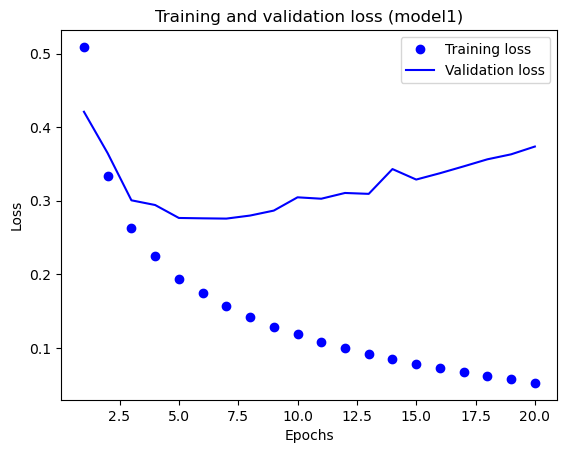

In [39]:
import matplotlib.pyplot as plt
loss_values = history1_dict["loss"]
val_loss_values = history1_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (model1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


For model1, overfitting is seen past the 5th epoch.

**Plotting the training and validation accuracy for single representation layered model (model1)**

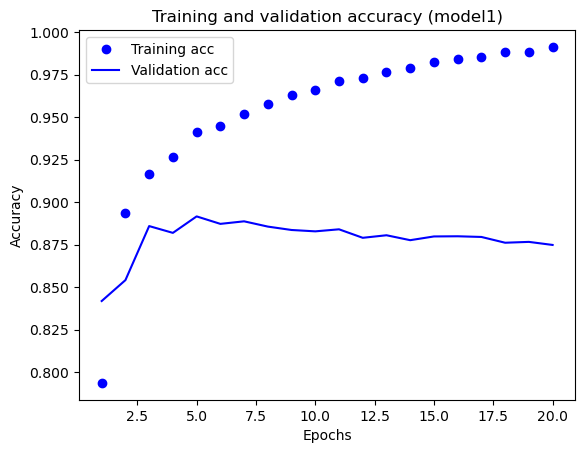

In [40]:
plt.clf()
acc = history1_dict["accuracy"]
val_acc = history1_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy (model1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Plotting the training and validation loss for triple  representation layered model (model3)**

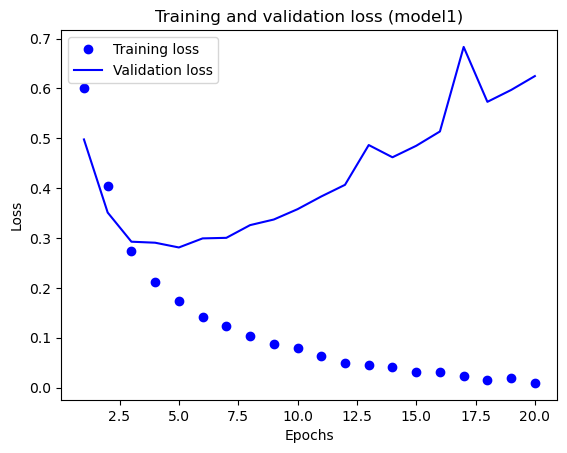

In [41]:
import matplotlib.pyplot as plt
loss_values = history3_dict["loss"]
val_loss_values = history3_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (model3)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


There also looks to be overfitting on model3 past the 5 epoch, with spikes at 12 and 17.

**Plotting the training and validation accuracy for triple representation layered model (model3)**

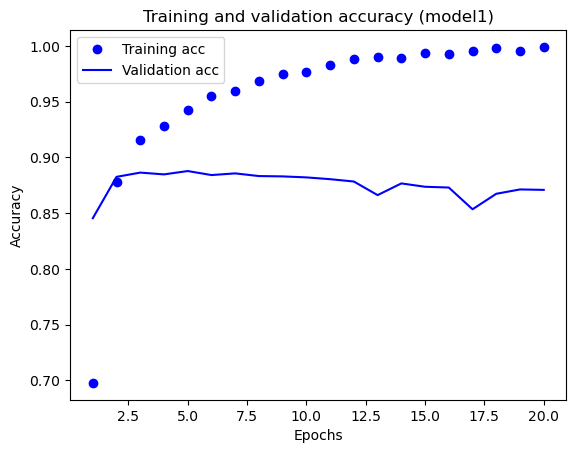

In [42]:
plt.clf()
acc = history3_dict["accuracy"]
val_acc = history3_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy (model3)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Ex1: Going with epoch 5 for both model1 and model3

In [45]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=5, batch_size=512)


model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model3.fit(x_train, y_train, epochs=5, batch_size=512)

results1 = model1.evaluate(x_test, y_test)
results3 = model3.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9704 - loss: 0.0940
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9770 - loss: 0.0806
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9785 - loss: 0.0750
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9823 - loss: 0.0678
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9857 - loss: 0.0580
Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9752 - loss: 0.0804
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9861 - loss: 0.0567
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9916 - loss: 0.0381
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9936 - loss: 0.0313
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9923 - loss: 0.0306
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8622 - loss: 0.4368
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8556 - loss: 0.6741


In [47]:
print(f'{results1}')
print(f'{results3}')
# result1[0.4295964539051056, 0.8638799786567688]
# result3 [0.6694844365119934, 0.8572800159454346]
#loss,accuracy
#lower loss is better
#higher accuracy is better.


#compared to results from sequential model, 2x 16 unit relu representational layer + 1 sigmoid, trained at 4 epochs 
# [0.29510343074798584, 0.8817200064659119]

# the baseline model performs the best on both metrics, followed by model1 and lastly model3


[0.4295964539051056, 0.8638799786567688]
[0.6694844365119934, 0.8572800159454346]


## Task 1.2: Models with layers consisting of 32 units

In [58]:
#single representation layered model with 32 units
model1_units32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])



#triple representation layered model with 32 units
model3_units32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1_units32.compile(optimizer= 'rmsprop',
            loss='binary_crossentropy',
            metrics=['accuracy'])




model3_units32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [59]:
history1_units32 = model1_units32.fit(partial_x_train,
                     partial_y_train,
                     epochs = 20,
                     batch_size=512,
                     validation_data=(x_val,y_val))


history3_units32 = model3_units32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6965 - loss: 0.5878 - val_accuracy: 0.8607 - val_loss: 0.3929
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8939 - loss: 0.3323 - val_accuracy: 0.8824 - val_loss: 0.3204
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9210 - loss: 0.2555 - val_accuracy: 0.8879 - val_loss: 0.2899
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9296 - loss: 0.2129 - val_accuracy: 0.8907 - val_loss: 0.2760
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9411 - loss: 0.1844 - val_accuracy: 0.8874 - val_loss: 0.2770
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9500 - loss: 0.1638 - val_accuracy: 0.8864 - val_loss: 0.2802
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9540 - loss: 0.1471 - val_accuracy: 0.8861 - val_loss: 0.2810
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9621 - loss: 0.1300 - val_accuracy: 0.8725 - v

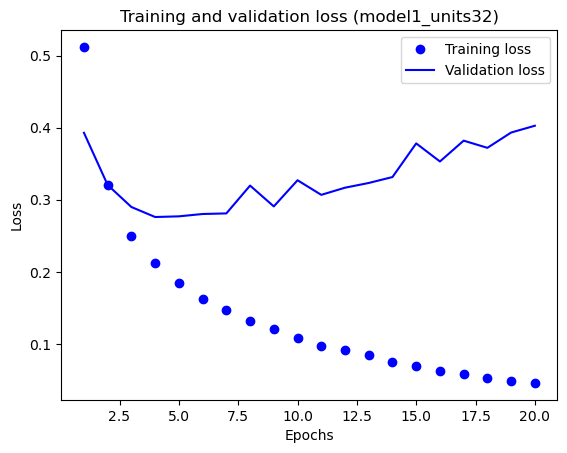

In [60]:
history1_units32_dict = history1_units32.history
loss_values = history1_units32_dict["loss"]
val_loss_values = history1_units32_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (model1_units32)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


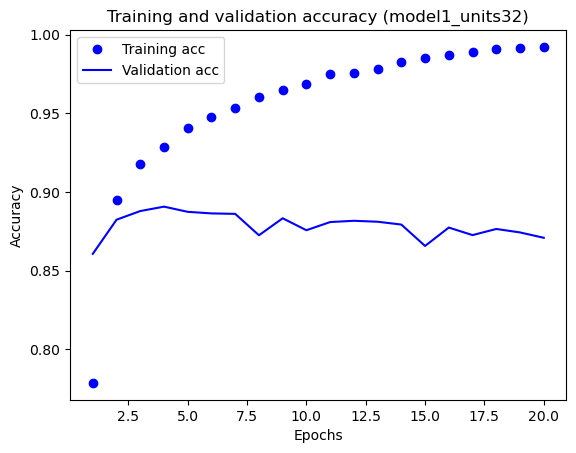

In [61]:
plt.clf()
acc = history1_units32_dict["accuracy"]
val_acc = history1_units32_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy (model1_units32)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



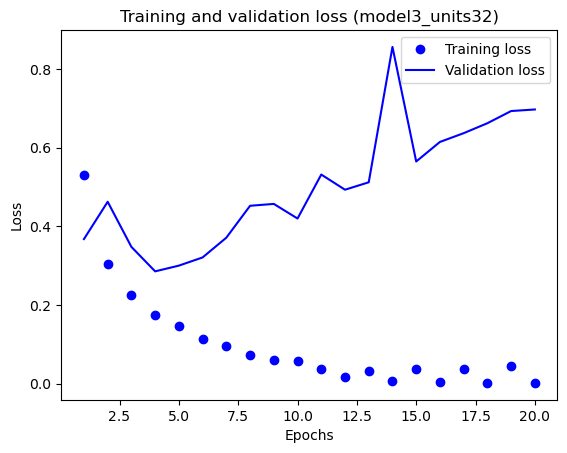

In [62]:
history3_units32_dict = history3_units32.history
loss_values = history3_units32_dict["loss"]
val_loss_values = history3_units32_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss (model3_units32)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


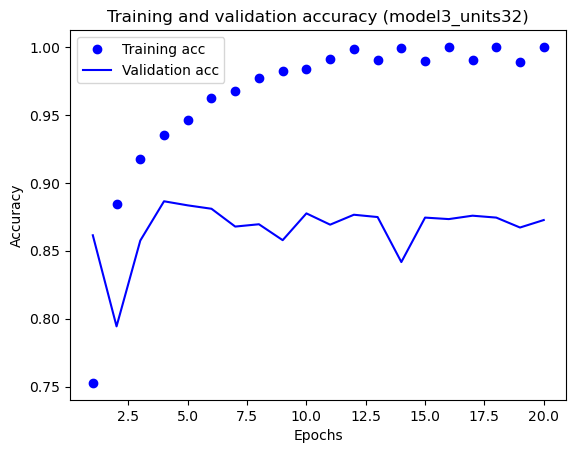

In [64]:
plt.clf()
acc = history3_units32_dict["accuracy"]
val_acc = history3_units32_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy (model3_units32)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



# Ex1: choosing epoch 10 for both

In [65]:
model1_units32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1_units32.fit(x_train, y_train, epochs=10, batch_size=512)


model3_units32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model3_units32.fit(x_train, y_train, epochs=10, batch_size=512)

results1_units32 = model1_units32.evaluate(x_test, y_test)
results3_units32 = model3_units32.evaluate(x_test, y_test)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9421 - loss: 0.2024
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9580 - loss: 0.1379
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9677 - loss: 0.1109
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9694 - loss: 0.1010
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9741 - loss: 0.0874
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9778 - loss: 0.0791
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9802 - loss: 0.0714
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9854 - loss: 0.0622
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9868 - loss: 0.0574
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9895 - loss: 0.0501
Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9384 - loss: 0.2882
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0

In [66]:
print(f'{results1_units32}')
print(f'{results3_units32}')
# results1_units32 [0.4493388533592224, 0.8637599945068359]
# results3_units32 [0.7723103761672974, 0.8664000034332275]


# result1[0.4295964539051056, 0.8638799786567688]
# result3 [0.6694844365119934, 0.8572800159454346]
#compared to results from sequential model, 2x 16 unit relu representational layer + 1 sigmoid, trained at 4 epochs 
# [0.29510343074798584, 0.8817200064659119]


# so far the best model remains the baseline one.

[0.4493388533592224, 0.8637599945068359]
[0.7723103761672974, 0.8664000034332275]


### Task 1.3 : Try using the mse loss function instead of binary_crossentropy
Doing this on the baseline model (Sequential model: 2x16 ReLU layers + 1 sigmoid, trained for 4 epochs.)

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


### THIS IS NOT GOOD ENOUGH!  -you need to figure out what epoch to run at first / review accuracy and loss
model.compile(optimizer = 'rmsprop',
              loss ='mean_squared_error',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/5
25/49 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6658 - loss: 0.2169

KeyboardInterrupt: 

## Exercise 2

For the multiclass classification example of classifying newswires, of chapter 4 of the book, please try out the "4.2.8 Further experiments" mentioned on page 113. (You can use the code from the chapter 4 notebook "chapter04_getting-started-with-neural-networks.ipynb" as your departure.)

## Exercise 3

For the regression example of predicting house prices, of chapter 4 of the book, please try out further experiments as for the other models. That is try out changing the number of layers and number of units in each layer. (You can use the code from the chapter 4 notebook "chapter04_getting-started-with-neural-networks.ipynb" as your departure.)